In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_excel('C:\\Users\\Dmitry\\Documents\\Учеба\\6 Диплом\\Hoff\\005_example.xlsx', parse_dates = ['date_id'], \
                     index_col = 'date_id')

In [45]:
data.head()

,good_id,ship_store_id,price,promo,sale,promo_price,holiday,owner_id
date_id,,,,,,,,
2018-09-16,149045,40,699,0,1,699,0,2
2018-03-17,149045,40,599,0,0,599,0,2
2018-03-23,149045,40,599,0,0,599,0,2
2017-07-25,149045,40,599,0,2,599,0,2
2018-10-04,173544,13,1399,0,0,1399,0,2


date_id - дата

good_id - код товара

ship_store_id - код магазина

price - цена

promo - флаг промо

sale - продажи

promo_price - промо цена

holiday - флаг праздничного дня

owner_id - код региона


Задача:
1. Провести исследование данных. Представить результаты исследования и программный код.
2. Рассчитать регулярный прогноз (без промо) на 45, 46, 47, 48 календарные недели. Вы можете по своему усмотрению:
	а.	Делать прогноз на уровне дня, потом при подсчете результатов агрегировать прогноз и факт продаж на уровень недели.
	б.	Агрегировать продажи на уровень недели и рассчитывать прогноз на уровне недели.	 
Результат должен быть в разрезе good_id/ship_store_id/date (на уровне недели)
3. Оценить точность 1-MAPE понедельно. Представить результаты и код.

Чтобы избежать деления на ноль при рассчете MAPE, используйте модифицированную формулу:
MAPE = SUM(ABS(Predict-Fact)/MAX(Predict,Fact))

Как оцениваем:
1. Консолидируем прогноз и факт для пересечения ship_store_id / good_id  до уровня недели.
2. Из полученного прогноза "выкалываем" пересечения ship_store_id / good_id / неделя если в какой-либо день недели у товара было промо.
3. По оставшимся пересечениям ship_store_id / good_id / неделя зассчитываем MAPE для каждой недели.

Желательная недельная целевая точность (1-MAPE):
0.45 - удовлетворительно
0.5 - хорошо
0.55 - прекрасно!

## 1. Анализ данных

Пропусков нет:

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529577 entries, 2018-09-16 to 2019-11-29
Data columns (total 8 columns):
good_id          529577 non-null int64
ship_store_id    529577 non-null int64
price            529577 non-null int64
promo            529577 non-null int64
sale             529577 non-null int64
promo_price      529577 non-null int64
holiday          529577 non-null int64
owner_id         529577 non-null int64
dtypes: int64(8)
memory usage: 36.4 MB


Количество уникальных товаров:

In [30]:
data['good_id'].nunique()

50

Уникальных магазинов:

In [31]:
data['ship_store_id'].nunique()

46

In [51]:
week_data = data.sale.resample('W').sum()

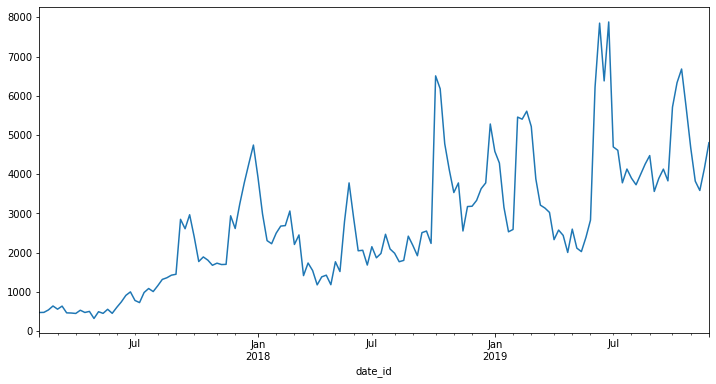

In [55]:
week_data.plot(figsize=(12,6))